# Proyecto: Clasificación de Actividades

## Importación de DataFrame

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import sklearn as skl
import numpy as np
import scipy as sci

DIR='C:\Projects\Physical_activity_classifier/Smartphone_Dataset'
xdata,ydata,error=[],[],[]
Activities=['bike','climbing','descending','gymbike','jumping','running','standing','treadmill','walking']
for suj in range(1,10):#######################10
    print('Extrayendo datos S0{}'.format(suj))
    for act in range(0,9):###################9
        for k in range(1,6):
            path=DIR+'/S0'+str(suj)+'/'+Activities[act]+str(k)+'.csv'
            try:
                #Activity[j].append(pd.read_csv(path,header=None))
                df=pd.read_csv(path,header=None)
                
                #print(type(df))
                data=df.as_matrix()
                d_size=len(data)
                #print(data)
                final_data=[]
                #Extract data for sensor
                sensors=[[],[],[],[],[],[],[],[],[]]
                for i in range(0,d_size):
                    for j in range(0,9):
                        sensors[j].append(data[i][j])

                #---------------------mean-----------------------
                for j in range(0,9):
                    final_data.append(np.mean(sensors[j]))
                #---------------------Var------------------------    
                for j in range(0,9):
                    final_data.append(np.var(sensors[j]))
                #---------------------Min------------------------    
                for j in range(0,9):
                    final_data.append(np.min(sensors[j]))
                #---------------------Max------------------------    
                for j in range(0,9):
                    final_data.append(np.max(sensors[j]))
                #---------------------Range------------------------    
                for j in range(0,9):
                    aux=np.max(sensors[j])-np.min(sensors[j])
                    final_data.append(aux)
                #-------------------RMS----------------------
                for j in range(0,9):
                    RMS=0
                    for i in range(0,d_size):
                        RMS+=np.sqrt((1/d_size)*sensors[j][i]*sensors[j][i])
                    final_data.append(RMS)
                #-------------------Entropy----------------------
                for j in range(0,9):
                    H=sci.stats.entropy(sensors[j])
                    #final_data.append(H)
                #-------------------Kurtosis----------------------
                for j in range(0,9):
                    final_data.append(sci.stats.kurtosis(sensors[j]))
                #-------------------EnergyExpenditure----------------------
                for j in range(0,3):
                    EE=0
                    for i in range(0,d_size):
                        EE+=(1/d_size)*np.sqrt(sensors[0+j*3][i]*sensors[0+j*3][i]+sensors[1+j*3][i]*sensors[1+j*3][i]+sensors[2+j*3][i]*sensors[2+j*3][i])
                    final_data.append(EE)
                #-------------------MagnitudeArea----------------------
                for j in range(0,3):
                    SMA=0
                    for i in range(0,d_size):
                        SMA+=(1/d_size)*(np.abs(sensors[0+j*3][i])+np.abs(sensors[1+j*3][i])+np.abs(sensors[2+j*3][i]))
                    final_data.append(SMA)
                
                #print(final_data)
                xdata.append(final_data)
                ydata.append(act)
                
            except FileNotFoundError :
                estr=Activities[act]+str(k)
                error.append(estr)
                #print(path+' path doesn t exist')
        
    
print('Cantidad de datos: {}'.format(len(xdata)))
print('Cantidad de caracteristicas: {}'.format(len(xdata[0])))
#print('Datos por actividad: [{},{},{},{},{},{},{},{},{}]'.format(len(Activity[0]),len(Activity[1]),len(Activity[2]),len(Activity[3]),len(Activity[4]),len(Activity[5]),len(Activity[6]),len(Activity[7]),len(Activity[8])))
x,y=[],[]
xtrain,ytrain=[],[]
xval,yval=[],[]
xtest,ytest=[],[]

x,xtest,y,ytest=train_test_split(xdata,ydata,test_size=0.2,shuffle=True)
print(y)

Extrayendo datos S01
Extrayendo datos S02
Extrayendo datos S03
Extrayendo datos S04
Extrayendo datos S05
Extrayendo datos S06
Extrayendo datos S07
Extrayendo datos S08
Extrayendo datos S09
Cantidad de datos: 383
Cantidad de caracteristicas: 69
[1, 2, 2, 1, 7, 4, 6, 2, 2, 8, 4, 5, 0, 3, 0, 4, 4, 2, 4, 2, 8, 6, 4, 6, 6, 6, 8, 8, 8, 0, 3, 8, 8, 6, 6, 5, 2, 2, 4, 1, 4, 0, 7, 5, 5, 3, 1, 5, 4, 3, 7, 6, 7, 2, 0, 1, 2, 7, 7, 1, 5, 6, 2, 6, 1, 1, 4, 5, 6, 0, 4, 6, 6, 5, 0, 3, 3, 8, 7, 2, 1, 7, 6, 3, 3, 0, 4, 4, 8, 3, 2, 1, 2, 5, 6, 6, 1, 4, 2, 1, 7, 2, 8, 2, 5, 5, 4, 8, 3, 3, 4, 1, 5, 7, 5, 6, 3, 2, 3, 6, 7, 0, 1, 8, 0, 5, 7, 3, 7, 5, 2, 5, 3, 7, 2, 8, 8, 7, 5, 4, 1, 5, 6, 1, 5, 0, 2, 1, 4, 7, 1, 1, 5, 1, 7, 4, 3, 5, 5, 6, 1, 4, 8, 0, 2, 3, 0, 4, 6, 5, 8, 3, 0, 6, 6, 2, 0, 1, 8, 2, 7, 3, 2, 4, 4, 3, 0, 6, 6, 5, 2, 5, 6, 6, 7, 1, 8, 8, 8, 5, 4, 2, 4, 0, 2, 4, 3, 5, 4, 1, 3, 6, 1, 3, 3, 6, 8, 1, 2, 0, 4, 3, 4, 5, 8, 4, 1, 0, 5, 1, 6, 8, 5, 7, 0, 2, 0, 4, 4, 4, 4, 6, 8, 5, 8, 7, 0, 7, 7, 7, 3, 3,

In [2]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    if normalize:
        cm = 100 * cm / cm.sum(1)
    plt.figure(figsize=(15,7))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.0f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import time
def ANN_train(xdata,ydata,hl_size=10,act='relu'):
    clf = MLPClassifier(activation=act,solver='lbfgs', hidden_layer_sizes=hl_size,
    early_stopping = True, validation_fraction = 0.25);
    
    xtrain,xval,ytrain,yval=train_test_split(xdata,ydata,random_state=clf.random_state,
                                                       test_size=clf.validation_fraction)
    clf.fit(xdata, np.ravel(ydata))
    return [clf,xtrain,xval,ytrain,yval]
    

def ANN_perf(xtest,ytest,clf):
    ypred=clf.predict(xtest)
    c_m=confusion_matrix(np.ravel(ytest), ypred)
    return c_m

def get_D(c_m):
    dsum=0
    for i in range(0,len(c_m)):
        dsum+=c_m[i][i]
    return dsum

def get_Darray(c_m):
    D=[]
    for i in xrange(0,len(c_m)):
        D.append(c_m[i][i])
    return D

## Redes Neuronales

-------------------------------------------------
Neural Network
-------------------------------------------------
Clasificaciones exitosas: 75 de 77(97.4026%)


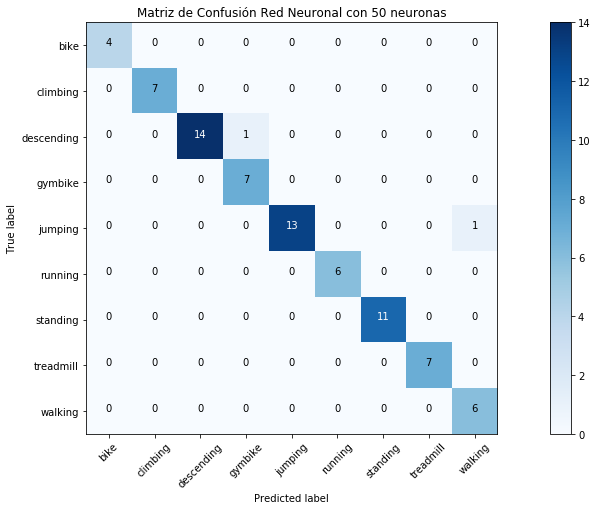

In [4]:
#hl_size_op=5000#(28+10)//2
hl_s=[10,50,500]

print('-------------------------------------------------')
print('Neural Network')
print('-------------------------------------------------')
best_cm=None
best_acc=0
best_hls=0
for i in range(0,3):
    clf,xtrain,xval,ytrain,yval=ANN_train(x,y,hl_size=hl_s[i])
    c_m=ANN_perf(xval,np.ravel(yval),clf)
    acc=get_D(c_m)
    if acc>best_acc:
        best_acc=acc
        best_cm=c_m
        best_hls=hl_s[i]
title='Matriz de Confusión Red Neuronal con '+str(best_hls)+ ' neuronas'
#print('Tiempo de entrenamiento: {}s'.format(dt))
plot_confusion_matrix(best_cm,Activities,normalize=False,title=title)
percentage=np.round((best_acc/(len(yval)*1.0))*100,4)
print('Clasificaciones exitosas: {} de {}({}%)'.format(best_acc,len(yval),percentage))

## Support Vector Machine

-------------------------------------------------
Support Vector Machine
-------------------------------------------------
Clasificaciones exitosas: 68 de 77(88.3117%)


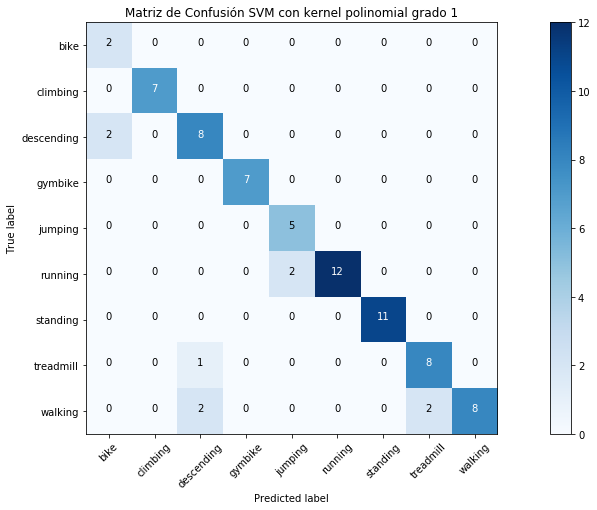

In [5]:
from sklearn.svm import SVC,LinearSVC
def svm_poly(xtrain,ytrain,xtest,ytest,deg=1):
    #Entrenamiento
    std_scale=skl.preprocessing.StandardScaler().fit(xtrain)
    df_std = std_scale.transform(xtrain)
    clf = SVC(kernel='poly',degree=deg)
    clf.fit(df_std, ytrain)  
    #Validacion
    std_scale=skl.preprocessing.StandardScaler().fit(xtest)
    xtest_n = std_scale.transform(xtest)
    #score = clf_p.decision_function(feattest)
    #ypred=clf.predict(feattest)
    
    c_m=ANN_perf(xtest_n,ytest,clf)
    
    acc=get_D(c_m)
    return c_m,acc,deg
    
print('-------------------------------------------------')
print('Support Vector Machine')
print('-------------------------------------------------')
result=[]
result.append(svm_poly(xtrain,ytrain,xval,yval,deg=1))
result.append(svm_poly(xtrain,ytrain,xval,yval,deg=2))
result.append(svm_poly(xtrain,ytrain,xval,yval,deg=3))
best_acc=0
best_cm=None
best_deg=0
for i in range(0,3):
    if result[i][1]>best_acc:
        best_acc=result[i][1]
        best_cm=result[i][0]
        best_deg=result[i][2]

title='Matriz de Confusión SVM con kernel polinomial grado '+str(best_deg)
plot_confusion_matrix(best_cm,Activities,title=title)
percentage=np.round((best_acc/(len(yval)*1.0))*100,4)
print('Clasificaciones exitosas: {} de {}({}%)'.format(best_acc,len(yval),percentage))

## Naive Bayes

-------------------------------------------------
Gaussian Naive Bayes
-------------------------------------------------
Clasificaciones exitosas: 71 de 77(92.2078%)


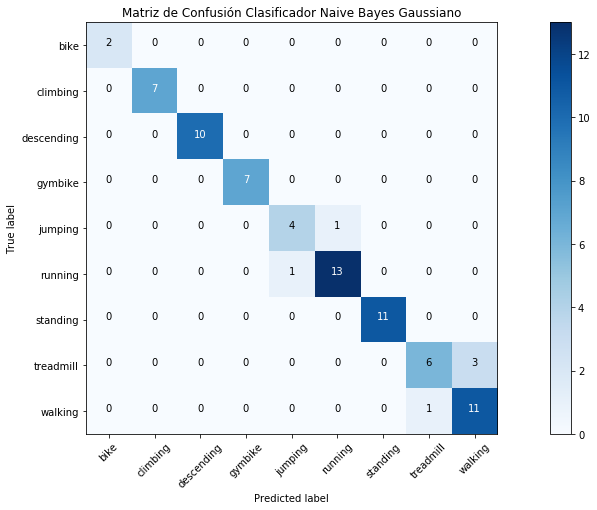

In [6]:
from sklearn.naive_bayes import GaussianNB
std_scale=skl.preprocessing.StandardScaler().fit(xtrain)
df_std = std_scale.transform(xtrain)

clf = GaussianNB().fit(df_std, ytrain)
xval_n = std_scale.transform(xval)

cm=ANN_perf(xval_n,yval,clf)

print('-------------------------------------------------')
print('Gaussian Naive Bayes')
print('-------------------------------------------------')

title='Matriz de Confusión Clasificador Naive Bayes Gaussiano'
plot_confusion_matrix(cm,Activities,title=title)
acc=get_D(cm)
percentage=np.round((acc/(len(yval)*1.0))*100,4)
print('Clasificaciones exitosas: {} de {}({}%)'.format(acc,len(yval),percentage))

## Selección de características

características x: 69
características x2: 30


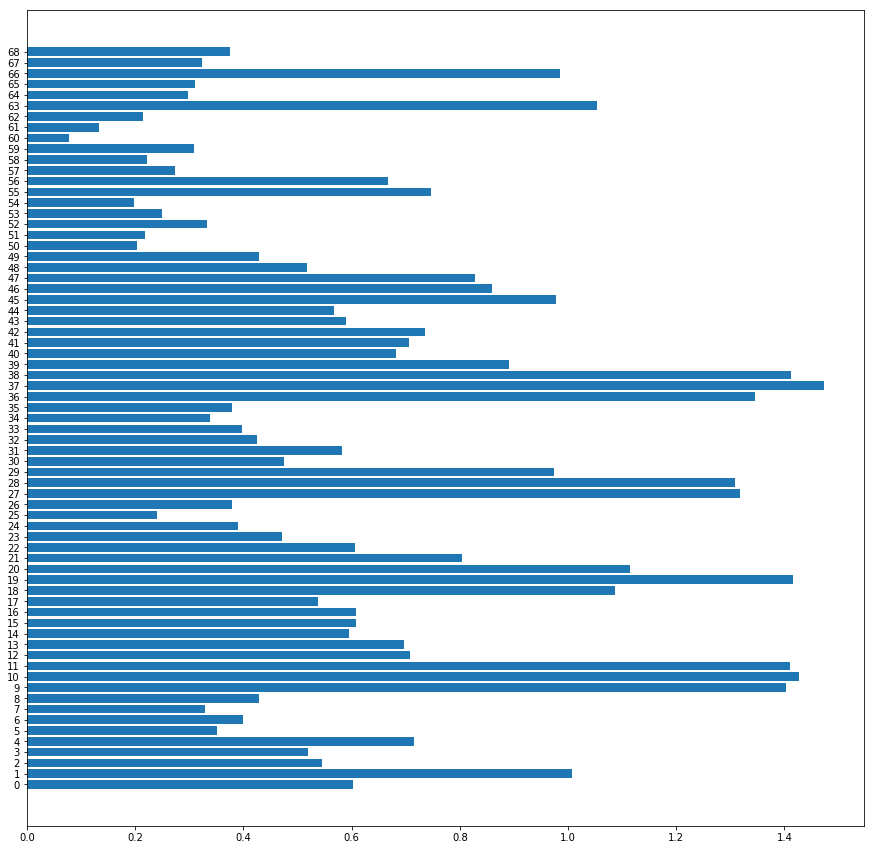

In [7]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
sel = SelectKBest(score_func=mutual_info_classif,k=30).fit(xtrain, ytrain)
x2= sel.transform(x)
print('características x: {}'.format(len(x[0])))
print('características x2: {}'.format(len(x2[0])))
scores=sel.scores_
feature_s=len(x[0])
features=np.arange(0,feature_s,1)
plt.figure(figsize=(15,15))
plt.barh(range(feature_s),scores)
plt.yticks(range(feature_s),features)
plt.show()

-------------------------------------------------
Neural Network
-------------------------------------------------
Clasificaciones exitosas: 77 de 77(100.0%)


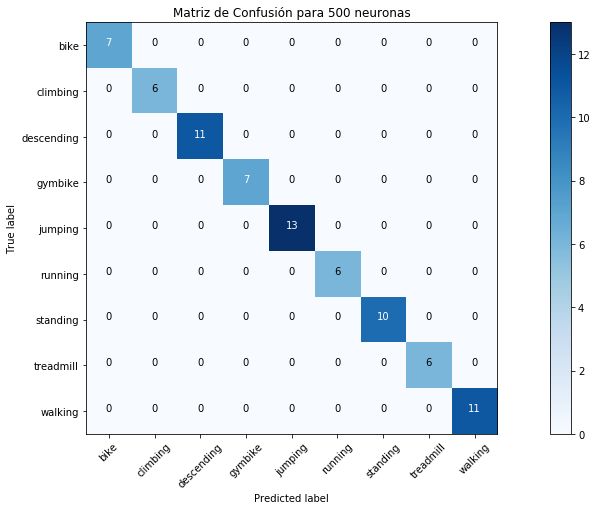

In [23]:
hl_s=[10,50,500]

print('-------------------------------------------------')
print('Neural Network')
print('-------------------------------------------------')
best_cm=None
best_acc=0
best_hls=0
for i in range(0,3):
    clf,xtrain,xval,ytrain,yval=ANN_train(x2,y,hl_size=hl_s[i])
    c_m=ANN_perf(xval,yval,clf)
    acc=get_D(c_m)
    if acc>best_acc:
        best_acc=acc
        best_cm=c_m
        best_hls=hl_s[i]
title='Matriz de Confusión para '+str(best_hls)+ ' neuronas'
#print('Tiempo de entrenamiento: {}s'.format(dt))
plot_confusion_matrix(best_cm,Activities,normalize=False,title=title)
percentage=np.round((best_acc/(len(yval)*1.0))*100,4)
print('Clasificaciones exitosas: {} de {}({}%)'.format(best_acc,len(yval),percentage))
#print(len(x2[0]))
#print(len(xval[0]))

-------------------------------------------------
Support Vector Machine
-------------------------------------------------
Matriz de Confusión para deg=1
Clasificaciones exitosas: 62 de 77(80.5195%)


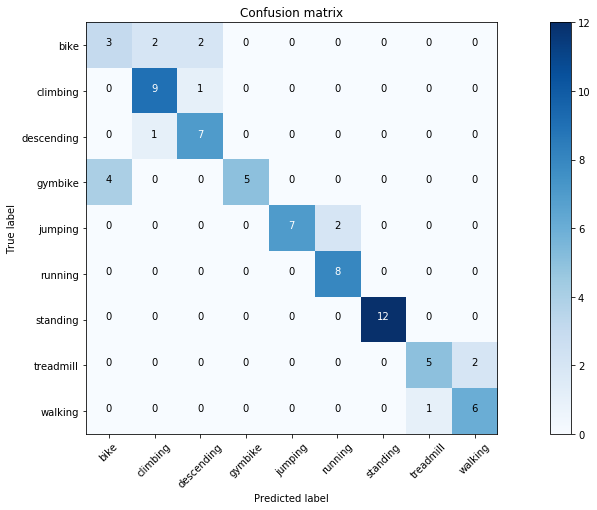

In [9]:
print('-------------------------------------------------')
print('Support Vector Machine')
print('-------------------------------------------------')
result=[]
result.append(svm_poly(xtrain,ytrain,xval,yval,deg=1))
result.append(svm_poly(xtrain,ytrain,xval,yval,deg=2))
result.append(svm_poly(xtrain,ytrain,xval,yval,deg=3))
best_acc=0
best_cm=None
best_deg=0
for i in range(0,3):
    if result[i][1]>best_acc:
        best_acc=result[i][1]
        best_cm=result[i][0]
        best_deg=result[i][2]

print('Matriz de Confusión para deg={}'.format(best_deg))
plot_confusion_matrix(best_cm,Activities)
percentage=np.round((best_acc/(len(yval)*1.0))*100,4)
print('Clasificaciones exitosas: {} de {}({}%)'.format(best_acc,len(yval),percentage))

-------------------------------------------------
Gaussian Naive Bayes
-------------------------------------------------
Matriz de Confusión:
Clasificaciones exitosas: 61 de 77(79.2208%)


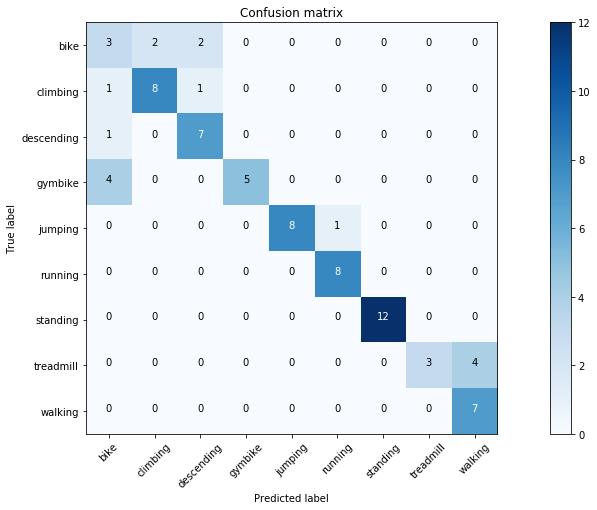

In [10]:
std_scale=skl.preprocessing.StandardScaler().fit(xtrain)
df_std = std_scale.transform(xtrain)

clf = GaussianNB().fit(df_std, ytrain)
xval_n = std_scale.transform(xval)

cm=ANN_perf(xval_n,yval,clf)

print('-------------------------------------------------')
print('Gaussian Naive Bayes')
print('-------------------------------------------------')

print('Matriz de Confusión:')
plot_confusion_matrix(cm,Activities)
acc=get_D(cm)
percentage=np.round((acc/(len(yval)*1.0))*100,4)
print('Clasificaciones exitosas: {} de {}({}%)'.format(acc,len(yval),percentage))

## Segunda Selección de Caracteríticas

características x2: 30
características x3: 10


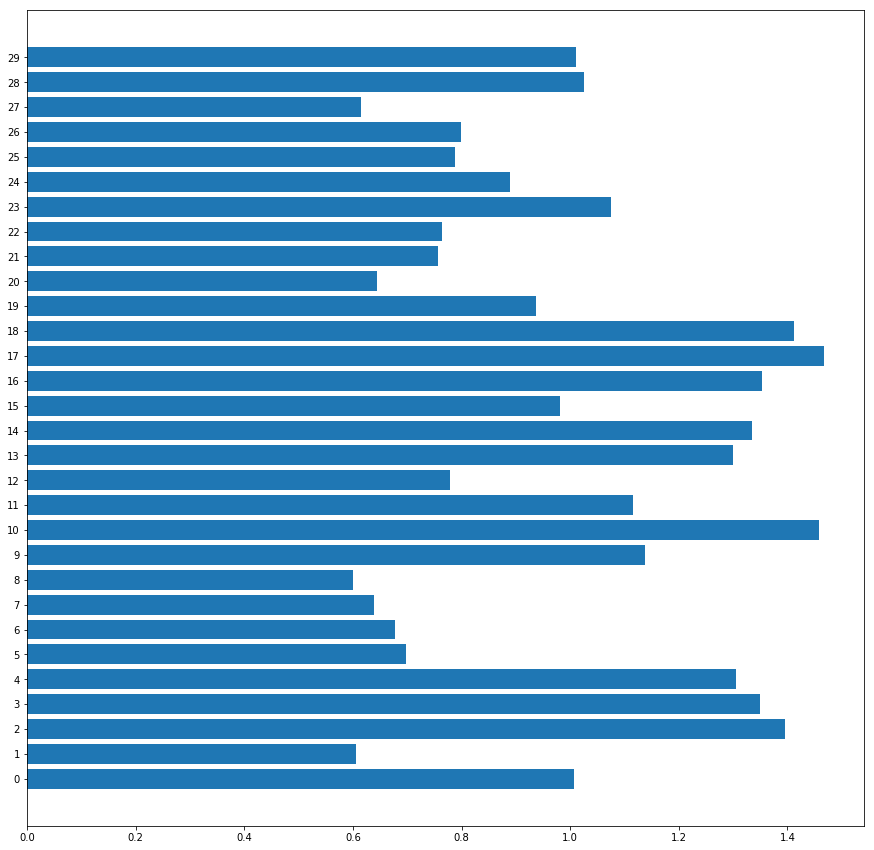

In [11]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
sel = SelectKBest(score_func=mutual_info_classif,k=10).fit(xtrain, ytrain)
x3= sel.transform(x2)
print('características x2: {}'.format(len(x2[0])))
print('características x3: {}'.format(len(x3[0])))
scores=sel.scores_
feature_s=len(x2[0])
features=np.arange(0,feature_s,1)
plt.figure(figsize=(15,15))
plt.barh(range(feature_s),scores)
plt.yticks(range(feature_s),features)
plt.show()

-------------------------------------------------
Neural Network
-------------------------------------------------
Clasificaciones exitosas: 69 de 77(89.6104%)


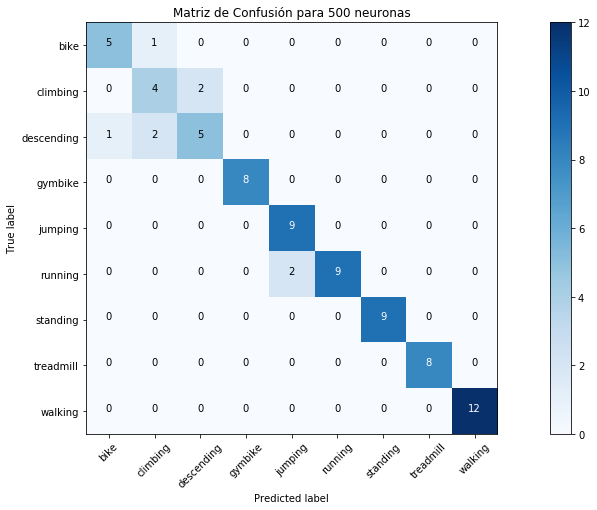

In [12]:
hl_s=[10,50,500]

print('-------------------------------------------------')
print('Neural Network')
print('-------------------------------------------------')
best_cm=None
best_acc=0
best_hls=0
for i in range(0,3):
    clf,xtrain,xval,ytrain,yval=ANN_train(x3,y,hl_size=hl_s[i])
    c_m=ANN_perf(xval,yval,clf)
    acc=get_D(c_m)
    if acc>best_acc:
        best_acc=acc
        best_cm=c_m
        best_hls=hl_s[i]
title='Matriz de Confusión para '+str(best_hls)+ ' neuronas'
#print('Tiempo de entrenamiento: {}s'.format(dt))
plot_confusion_matrix(best_cm,Activities,normalize=False,title=title)
percentage=np.round((best_acc/(len(yval)*1.0))*100,4)
print('Clasificaciones exitosas: {} de {}({}%)'.format(best_acc,len(yval),percentage))

-------------------------------------------------
Support Vector Machine
-------------------------------------------------
Matriz de Confusión para deg=1
Clasificaciones exitosas: 57 de 77(74.026%)


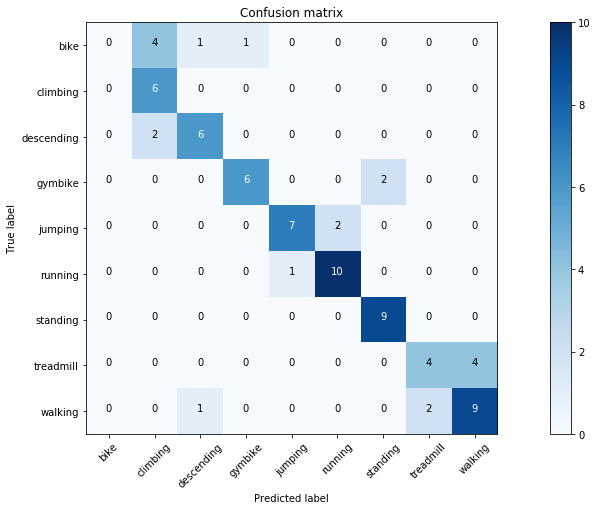

In [13]:
print('-------------------------------------------------')
print('Support Vector Machine')
print('-------------------------------------------------')
result=[]
result.append(svm_poly(xtrain,ytrain,xval,yval,deg=1))
result.append(svm_poly(xtrain,ytrain,xval,yval,deg=2))
result.append(svm_poly(xtrain,ytrain,xval,yval,deg=3))
best_acc=0
best_cm=None
best_deg=0
for i in range(0,3):
    if result[i][1]>best_acc:
        best_acc=result[i][1]
        best_cm=result[i][0]
        best_deg=result[i][2]

print('Matriz de Confusión para deg={}'.format(best_deg))
plot_confusion_matrix(best_cm,Activities)
percentage=np.round((best_acc/(len(yval)*1.0))*100,4)
print('Clasificaciones exitosas: {} de {}({}%)'.format(best_acc,len(yval),percentage))

-------------------------------------------------
Gaussian Naive Bayes
-------------------------------------------------
Matriz de Confusión:
Clasificaciones exitosas: 63 de 77(81.8182%)


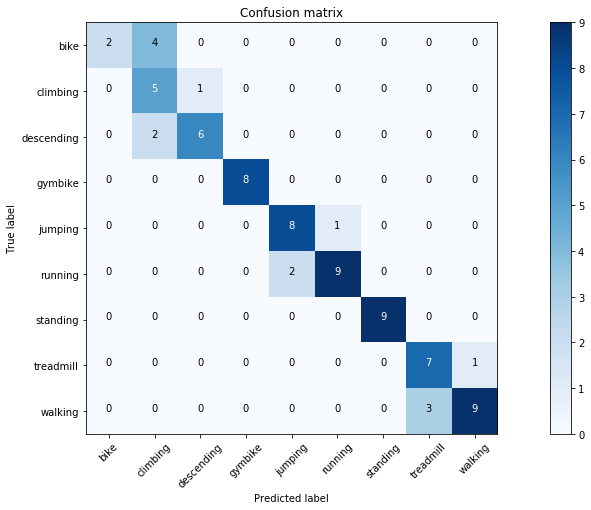

In [14]:
std_scale=skl.preprocessing.StandardScaler().fit(xtrain)
df_std = std_scale.transform(xtrain)

clf = GaussianNB().fit(df_std, ytrain)
xval_n = std_scale.transform(xval)

cm=ANN_perf(xval_n,yval,clf)

print('-------------------------------------------------')
print('Gaussian Naive Bayes')
print('-------------------------------------------------')

print('Matriz de Confusión:')
plot_confusion_matrix(cm,Activities)
acc=get_D(cm)
percentage=np.round((acc/(len(yval)*1.0))*100,4)
print('Clasificaciones exitosas: {} de {}({}%)'.format(acc,len(yval),percentage))

## Segunda Selección de Caracteríticas

características x3: 10
características x4: 5


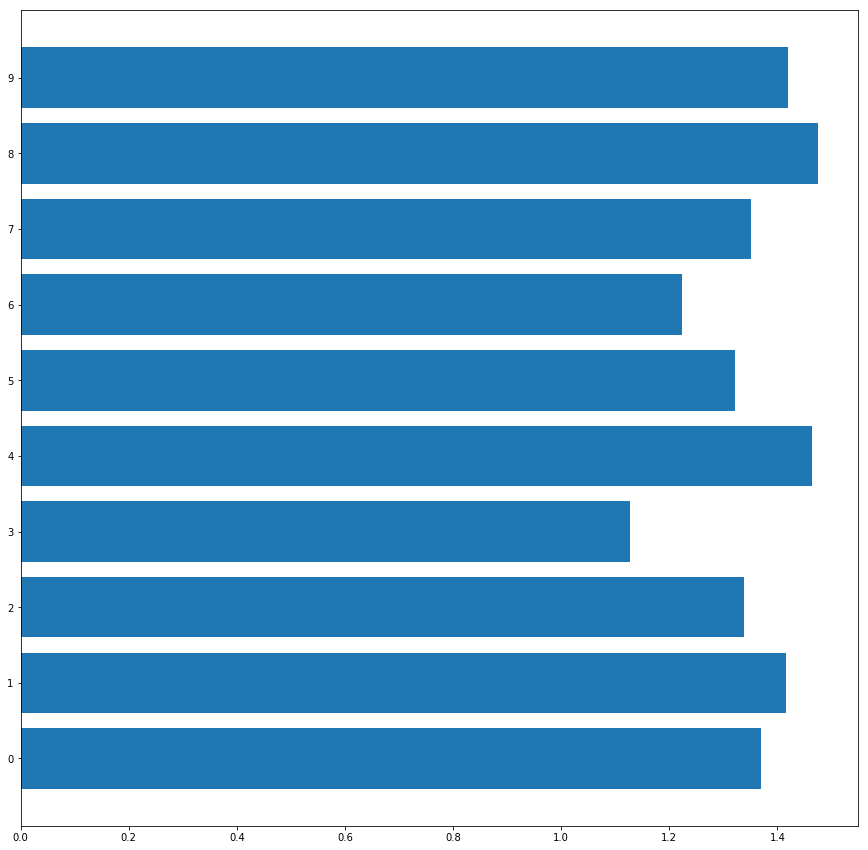

In [15]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
sel = SelectKBest(score_func=mutual_info_classif,k=5).fit(xtrain, ytrain)
x4= sel.transform(x3)
print('características x3: {}'.format(len(x3[0])))
print('características x4: {}'.format(len(x4[0])))
scores=sel.scores_
feature_s=len(x3[0])
features=np.arange(0,feature_s,1)
plt.figure(figsize=(15,15))
plt.barh(range(feature_s),scores)
plt.yticks(range(feature_s),features)
plt.show()

-------------------------------------------------
Neural Network
-------------------------------------------------
Clasificaciones exitosas: 61 de 77(79.2208%)


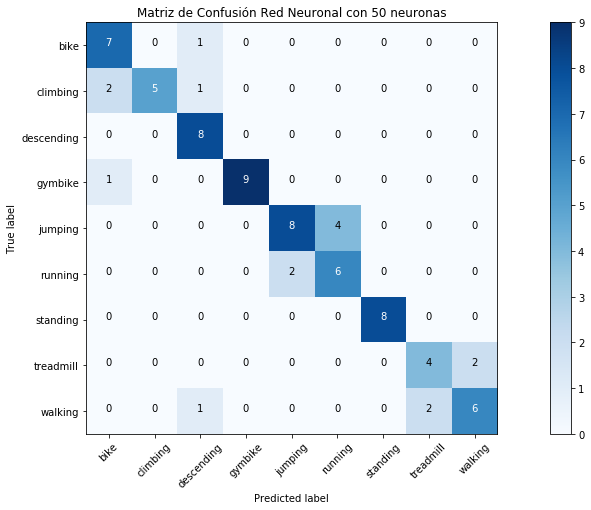

In [16]:
hl_s=[10,50,500]

print('-------------------------------------------------')
print('Neural Network')
print('-------------------------------------------------')
best_cm=None
best_acc=0
best_hls=0
for i in range(0,3):
    clf,xtrain,xval,ytrain,yval=ANN_train(x4,y,hl_size=hl_s[i])
    c_m=ANN_perf(xval,yval,clf)
    acc=get_D(c_m)
    if acc>best_acc:
        best_acc=acc
        best_cm=c_m
        best_hls=hl_s[i]
title='Matriz de Confusión Red Neuronal con '+str(best_hls)+ ' neuronas'
plot_confusion_matrix(best_cm,Activities,normalize=False,title=title)
percentage=np.round((best_acc/(len(yval)*1.0))*100,4)
print('Clasificaciones exitosas: {} de {}({}%)'.format(best_acc,len(yval),percentage))

-------------------------------------------------
Support Vector Machine
-------------------------------------------------
Clasificaciones exitosas: 50 de 77(64.9351%)


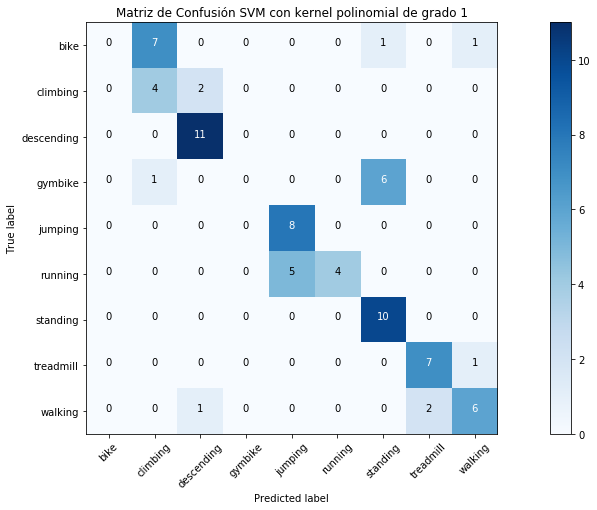

In [17]:
print('-------------------------------------------------')
print('Support Vector Machine')
print('-------------------------------------------------')
result=[]
result.append(svm_poly(xtrain,ytrain,xval,yval,deg=1))
result.append(svm_poly(xtrain,ytrain,xval,yval,deg=2))
result.append(svm_poly(xtrain,ytrain,xval,yval,deg=3))
best_acc=0
best_cm=None
best_deg=0
for i in range(0,3):
    if result[i][1]>best_acc:
        best_acc=result[i][1]
        best_cm=result[i][0]
        best_deg=result[i][2]

title='Matriz de Confusión SVM con kernel polinomial de grado '+str(best_deg)
plot_confusion_matrix(best_cm,Activities,title=title)
percentage=np.round((best_acc/(len(yval)*1.0))*100,4)
print('Clasificaciones exitosas: {} de {}({}%)'.format(best_acc,len(yval),percentage))

-------------------------------------------------
Gaussian Naive Bayes
-------------------------------------------------
Clasificaciones exitosas: 57 de 77(74.026%)


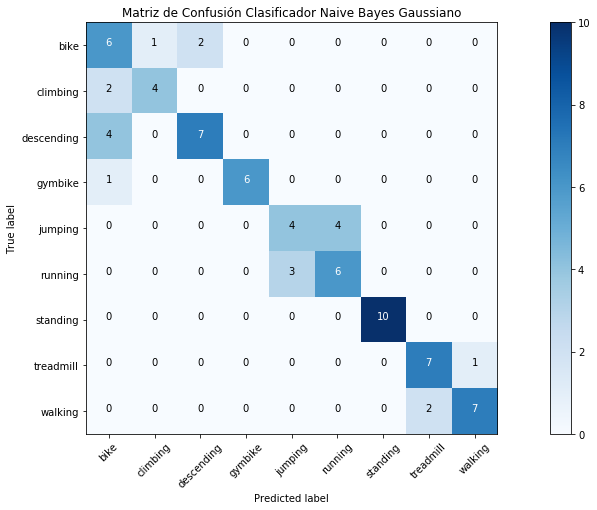

In [18]:
std_scale=skl.preprocessing.StandardScaler().fit(xtrain)
df_std = std_scale.transform(xtrain)

clf = GaussianNB().fit(df_std, ytrain)
xval_n = std_scale.transform(xval)

cm=ANN_perf(xval_n,yval,clf)

print('-------------------------------------------------')
print('Gaussian Naive Bayes')
print('-------------------------------------------------')

title='Matriz de Confusión Clasificador Naive Bayes Gaussiano'
plot_confusion_matrix(cm,Activities,title=title)
acc=get_D(cm)
percentage=np.round((acc/(len(yval)*1.0))*100,4)
print('Clasificaciones exitosas: {} de {}({}%)'.format(acc,len(yval),percentage))